<a href="https://colab.research.google.com/github/RubenQuispe/Machine-Learning-con-Python-001/blob/master/Lab_08_Regresi%C3%B3n_Polin%C3%B3mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Regresión Polinómica para predecir Emisión de CO2</center></h1>

##  Creado por [M.Sc. Ruben Quispe](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
### Curso [Machine Learning](https://eie.pe/curso-machine-learning/)

## Sobre este Notebook
En este notebook, aprenderemos a usar scikit learn para regresión polinómica. Descargamos el dataset de consumo de combustible y la emisión de CO2 de los automóviles. Luego dividimos nuestros datos en conjuntos de train y test, creamos un modelo usando el conjunto de train, evaluamos nuestro modelo usando el test set y finalmente usamos el modelo para predecir el valor desconocido.
# Tabla de contenidos
1. cargar o descargar data
2. regresión polinomial
3. Evaluación
4. Práctica
# Nuestro dataset comprende estos datos
Hemos descargado un conjunto de datos de consumo de combustible, FuelConsumption.csv, que contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para los vehículos ligeros nuevos para la venta minorista en Canadá. [Dataset](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)
1. MODELYEAR e.g. 2014
2. MAKE e.g. Acura
3. MODEL e.g. ILX
4. VEHICLE CLASS e.g. SUV
5. ENGINE SIZE e.g. 4.7
6. CYLINDERS e.g 6
7. TRANSMISSION e.g. A6
8. FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
9. FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
10. FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
11. CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

# 1. Importando las librerias necesarias 

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline 

# 2. Load o Descargar o Lear la data 

In [8]:
df = pd.read_csv("D:/TECHNOLOGY 2020/Data/FuelConsumption.csv")
# Mirar el dataset
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [9]:
# seleccionamos algunas caracteristicas 
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.tail(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1058,3.0,6,11.5,264
1059,3.2,6,10.2,235
1060,3.0,6,11.5,264
1061,3.2,6,11.2,258
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260
1066,3.2,6,12.8,294


<function matplotlib.pyplot.show(close=None, block=None)>

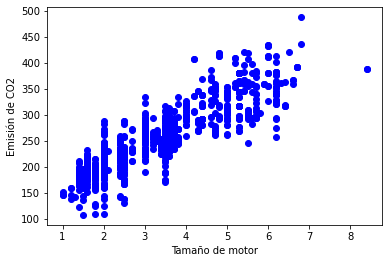

In [10]:
# Graficar los valores de emisión de CO2 respecto a Tamaño de motor
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color ='blue')
plt.xlabel("Tamaño de motor")
plt.ylabel("Emisión de CO2")
plt.show

# 3. Creando un conjunto de train y test
La división de conjunto de Train/Test, implica dividir el dataset en train set y test set, que son mutuamente excluyentes. Despues se debe entrenar con el train set y probar con el test set.

In [11]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

# 4. Regresión Polinomial
A veces, la tendencia de los datos no es realmente lineal y parece curvilínea. En este caso podemos utilizar métodos de regresión polinomial. De hecho, existen muchas regresiones diferentes que pueden usarse para ajustarse a cualquier aspecto del conjunto de datos, como cuadrático, cúbico, etc.y puede continuar hasta grados infinitos.

En esencia, podemos llamar a todos estos regresión polinomial, donde la relación entre la variable independiente x y la variable dependiente y se modela como un polinomio de enésimo grado en x. Digamos que desea tener una regresión polinomial (hagamos un polinomio de 2 grados):

$𝑦 = 𝑏 + \theta_1𝑥 + \theta_2𝑥^2 $
Ahora, la pregunta es: ¿cómo podemos ajustar nuestros datos en esta ecuación mientras solo tenemos valores x, como el tamaño del motor? Bueno, podemos crear algunas características adicionales: 1, $𝑥$ y $𝑥^2$.

La función **PloynomialFeatures()** en la biblioteca Scikit-learn, impulsa un nuevo conjunto de características del conjunto de características original. Es decir, se generará una matriz que consta de todas las combinaciones polinomiales de las características con grado menor o igual al grado especificado. Por ejemplo, digamos que el conjunto de características original tiene solo una característica, ENGINESIZE. Ahora, si seleccionamos el grado del polinomio para que sea 2, entonces genera 3 características, grado = 0, grado = 1 y grado = 2:

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x =np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly 

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** toma nuestros valores de x y genera una lista de nuestros datos elevados desde la potencia de 0 a la potencia de 2 (ya que establecemos el grado de nuestro polinomio en 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

Parecen conjuntos de características para análisis de regresión lineal múltiple, ¿verdad? Si. Lo hace. De hecho, la regresión polinomial es un caso especial de regresión lineal, con la idea principal de cómo seleccionar sus características. Solo considere reemplazar $𝑥$ con $𝑥1$, $𝑥_1^2$ con $𝑥_2$, y así sucesivamente. Entonces la ecuación de grado 2 se convertiría en:

$𝑦 = 𝑏 + \theta_1 𝑥_1 +\theta_2 𝑥2$

Ahora, podemos tratarlo como un problema de "regresión lineal". Por lo tanto, esta regresión polinomial se considera un caso especial de regresión lineal múltiple tradicional. Entonces, puede usar el mismo mecanismo que la regresión lineal para resolver tales problemas.

así que podemos usar la función **LinearRegression()** para resolverlo:

In [13]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.        50.482403  -1.5626212]]
Intercept:  [107.54994493]


Como se mencionó anteriormente, Coeficiente e Intercepción, son los parámetros de la línea curva ajustada. Dado que es una regresión lineal múltiple típica, con 3 parámetros, y sabiendo que los parámetros son la intersección y los coeficientes del hiperplano, sklearn los ha estimado a partir de nuestro nuevo conjunto de conjuntos de características. Vamos a trazarlo:

Text(0, 0.5, 'Emission')

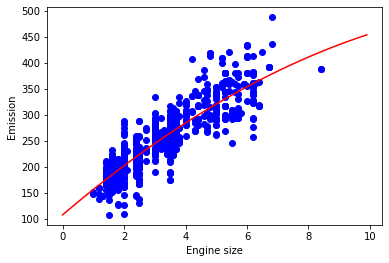

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

# 5.Evaluación

In [16]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.05
Residual sum of squares (MSE): 953.55
R2-score: 0.69


# 6. Práctica
Intente utilizar una regresión polinomial con el conjunto de datos, pero esta vez con grado tres (cúbico). ¿Da como resultado una mejor precisión?

Coefficients:  [[ 0.         33.19224459  3.18056691 -0.39110202]]
Intercept:  [125.96982931]
Mean absolute error: 22.88
Residual sum of squares (MSE): 946.14
R2-score: 0.70


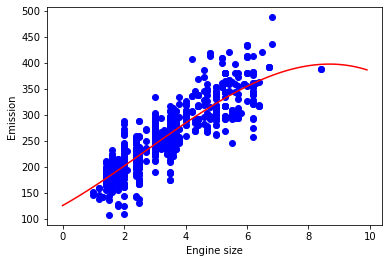

In [17]:
# Escribe tu codigo aqui
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )


# Muchas gracias 
### Atte:
# Mg.Rubén Quispe